In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("data_selected.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2.0,4.0,0.0
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,4.0,0.0
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2.0,3.0,0.0
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4.0,4.0,0.0
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,5.0,0.0


### Time to remove outliers

In [3]:
# can we make data cleaning a function?
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [4]:
df2 = data_clean("bedrooms", df)

In [5]:
df2.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df2.drop("lat", axis = 1, inplace = True)
df2.drop("long", axis = 1, inplace = True)
df2.drop("sqft_above", axis = 1, inplace = True)

In [7]:
#copied in data set about which city each zipcode belongs to
#zipcodes = pd.read_clipboard()
#zipcodes.to_csv("zipcodes.csv")
zipcodes = pd.read_csv("zipcodes.csv")

In [8]:
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")

In [9]:
zipcodes['Population'] = zipcodes['Population'].astype(int)

In [10]:
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)

In [11]:
zipcodes.drop("Classification", axis = 1, inplace = True)
zipcodes.drop("Timezone", axis = 1, inplace = True)
zipcodes.drop("Area Code(s)", axis = 1, inplace = True)

In [12]:
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)

In [13]:
#mergeing into main dataframe
df3 = df2.merge(zipcodes, on='zipcode', how='left')

In [14]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,Unnamed: 0,City,Population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,1340,5650,2.0,4.0,0.0,108,Seattle,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,1690,7639,2.0,4.0,0.0,80,Seattle,37081
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,NaN,98028,2720,8062,2.0,3.0,0.0,20,Kenmore,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,1360,5000,4.0,4.0,0.0,87,Seattle,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,1800,7503,2.0,5.0,0.0,52,Sammamish,25748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20506,6669080120,2014-12-15,405000.0,4,2.50,1980,5020,2.0,NO,NONE,...,0.0,98056,1980,5064,2.0,5.0,0.0,40,Renton,32489
20507,9211010300,2014-07-07,509900.0,3,2.50,3030,9053,2.0,NO,NONE,...,0.0,98059,3010,6026,2.0,5.0,0.0,43,Renton,34463
20508,3277800823,2014-08-20,327000.0,2,2.00,1490,1627,2.0,NO,NONE,...,0.0,98126,1400,1498,2.0,4.0,0.0,81,Seattle,20698
20509,8835770330,2014-08-19,1060000.0,2,1.50,2370,184231,2.0,NO,NONE,...,0.0,98045,3860,151081,2.0,5.0,0.0,33,North Bend,13888


In [15]:
df3 = data_clean("price", df3)
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,Unnamed: 0,City,Population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,1340,5650,2.0,4.0,0.0,108,Seattle,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,1690,7639,2.0,4.0,0.0,80,Seattle,37081
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,NaN,98028,2720,8062,2.0,3.0,0.0,20,Kenmore,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,1360,5000,4.0,4.0,0.0,87,Seattle,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,1800,7503,2.0,5.0,0.0,52,Sammamish,25748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,8562770720,2015-04-23,589999.0,3,2.50,2140,3628,2.0,NO,NONE,...,0.0,98027,2280,2812,2.0,5.0,0.0,19,Issaquah,26141
20506,6669080120,2014-12-15,405000.0,4,2.50,1980,5020,2.0,NO,NONE,...,0.0,98056,1980,5064,2.0,5.0,0.0,40,Renton,32489
20507,9211010300,2014-07-07,509900.0,3,2.50,3030,9053,2.0,NO,NONE,...,0.0,98059,3010,6026,2.0,5.0,0.0,43,Renton,34463
20508,3277800823,2014-08-20,327000.0,2,2.00,1490,1627,2.0,NO,NONE,...,0.0,98126,1400,1498,2.0,4.0,0.0,81,Seattle,20698


In [66]:
df5 = df3

In [68]:
df5['bed/bath'] = df5['bedrooms']/df5['bathrooms']

In [96]:
df5['water_bool'] = df5['waterfront'].str.replace("NO", "0")
df5['water_bool'] = df5['water_bool'].str.replace("YES", "1")
df5.dropna(subset = ['water_bool'], inplace = True)

1        0
2        0
3        0
4        0
6        0
        ..
20505    0
20506    0
20507    0
20508    0
20510    0
Name: water_bool, Length: 16836, dtype: object

In [103]:
df5['water_bool'] = df5['water_bool'].astype(int)

In [104]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16836 entries, 1 to 20510
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16836 non-null  int64  
 1   date           16836 non-null  object 
 2   price          16836 non-null  float64
 3   bedrooms       16836 non-null  int64  
 4   bathrooms      16836 non-null  float64
 5   sqft_living    16836 non-null  int64  
 6   sqft_lot       16836 non-null  int64  
 7   floors         16836 non-null  float64
 8   waterfront     16836 non-null  object 
 9   view           16836 non-null  object 
 10  condition      16836 non-null  object 
 11  grade          16836 non-null  object 
 12  sqft_basement  16836 non-null  float64
 13  yr_built       16836 non-null  int64  
 14  yr_renovated   13864 non-null  float64
 15  zipcode        16836 non-null  int64  
 16  sqft_living15  16836 non-null  int64  
 17  sqft_lot15     16836 non-null  int64  
 18  cond_n

In [119]:
df6 = df5.drop(columns = ['bath/bed','waterbool','id', 'date', 'waterfront', 'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'Unnamed: 0'])

In [120]:
df6 = df6.dropna(subset = ['yr_renovated'])

In [128]:
df6.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'cond_num',
       'grade_num', 'view_num', 'City', 'Population', 'bed/bath',
       'water_bool'],
      dtype='object')

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [130]:
lr = LinearRegression()

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'cond_num',
       'grade_num', 'view_num', 'Population', 'bed/bath',
       'water_bool']
X = df6[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
print(lr.coef_)
print(X.columns)
print(lr.intercept_)
print(lr.score(X_train, y_train))

[-2.82346543e+04  3.31342767e+04  1.66210391e+02 -5.49497183e-02
  5.36293972e+04 -8.66506653e+00 -1.99025729e+03  4.39853012e+00
  8.05001918e+01 -3.19776137e+03  1.40122020e+03 -1.10988640e+02
 -1.35450900e+00 -5.03507936e+03  1.16257064e+05]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'cond_num',
       'grade_num', 'view_num', 'Population', 'bed/bath', 'water_bool'],
      dtype='object')
-3831253.0688125915
0.43227124732912525


In [145]:
X = df6.drop(columns=['price', 'City', 'sqft_lot','yr_renovated','cond_num','grade_num','view_num'])
y = df6['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1046.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:08:31   Log-Likelihood:            -1.8418e+05
No. Observations:               13864   AIC:                         3.684e+05
Df Residuals:                   13853   BIC:                         3.685e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.384e+06   2.51e+06     -2.939      0.003   -1.23e+07   -2.46e+06
bedrooms       -2.12e+04   3441.764     -6.161      0.000    -2.8e+04   -1.45e+04
bathrooms      2.379e+04   5903.147      4.030      0.000    1.22e+04    3.54e+04
sqft_living     164.7530      2.717     60.639      0.000     159.427     170.079
floors         5.427e+04   3185.744     17.034      0.000     4.8e+04    6.05e+04
sqft_basement   -10.2933      3.960     -2.600      0.009     -18.055      -2.532
yr_built      -1984.7206     57.804    -34.336      0.000   -2098.024   -1871.417
zipcode         116.7186     25.272      4.619      0.000      67.183     166.254
Population       -1.1977      0.110    -10.913      0.000      -1.413      -0.983
bed/bath      -1.575e+04   5128.512     -3.072      0.002   -2.58e+04   -5701.785
water_bool     1.132e+05   2.53e+04      4.478      0.000    6.36e+04    1.63e+05
==============================================================================
Omnibus:                      277.982   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.743
Skew:                           0.357   Prob(JB):                     9.94e-65
Kurtosis:                       2.979   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The end

DO NOT USE df_numeric OR df4 BEFORE THIS

In [21]:
df4 = df3
df4 = df3.dropna(subset = ['yr_renovated', 'waterfront'])

In [28]:
X_zipcode = pd.get_dummies(df4['zipcode'], drop_first = True)
X_zipcode

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df4 = pd.concat([df4, X_zipcode], axis = 1)

In [42]:
df_numeric = df4.drop(columns=['id','date', 'waterfront', 'view', 'condition', 'grade', 'City', 'zipcode', 'Unnamed: 0', 'Population'])

In [47]:
df_numeric['bath/bed'] = df_numeric['bathrooms']/df_numeric['bedrooms']
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,sqft_living15,...,98155,98166,98168,98177,98178,98188,98198,98199,bed/bath,bath/bed
1,538000.0,3,2.25,2570,7242,2.0,400.0,1951,1991.0,1690,...,0,0,0,0,0,0,0,0,1.333333,0.750000
3,604000.0,4,3.00,1960,5000,1.0,910.0,1965,0.0,1360,...,0,0,0,0,0,0,0,0,1.333333,0.750000
4,510000.0,3,2.00,1680,8080,1.0,0.0,1987,0.0,1800,...,0,0,0,0,0,0,0,0,1.500000,0.666667
6,229500.0,3,1.00,1780,7470,1.0,730.0,1960,0.0,1780,...,0,0,0,0,0,0,0,0,3.000000,0.333333
7,323000.0,3,2.50,1890,6560,2.0,0.0,2003,0.0,2390,...,0,0,0,0,0,0,0,0,1.200000,0.833333


<AxesSubplot:xlabel='bath/bed', ylabel='price'>

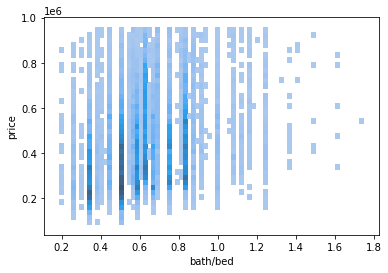

In [65]:
sns.histplot(data = df_numeric, x = df_numeric['bath/bed'], y = df_numeric['price'])

In [48]:
X = df_numeric.drop(columns=['price', 'bedrooms', 'bathrooms'])
y = df_numeric['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     673.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -1.7692e+05
No. Observations:               13864   AIC:                         3.540e+05
Df Residuals:                   13781   BIC:                         3.546e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.758e+05    7.8e+04      6.097      0.000    3.23e+05    6.29e+05
sqft_living     136.9112      1.858     73.673      0.000     133.269     140.554
sqft_lot          0.3044      0.026     11.799      0.000       0.254       0.355
floors        -1.519e+04   2120.915     -7.162      0.000   -1.93e+04    -1.1e+04
sqft_basement   -50.8006      2.540    -19.997      0.000     -55.780     -45.821
yr_built       -285.6476     39.662     -7.202      0.000    -363.391    -207.904
yr_renovated     15.4309      2.075      7.435      0.000      11.363      19.499
sqft_living15    55.1543      2.034     27.114      0.000      51.167      59.142
sqft_lot15        0.0041      0.040      0.103      0.918      -0.074       0.082
cond_num       1032.5595   1126.219      0.917      0.359   -1174.983    3240.102
grade_num       516.3545    649.260      0.795      0.426    -756.284    1788.993
view_num      -1026.7148    975.498     -1.053      0.293   -2938.824     885.394
98002          1.347e+04   8975.854      1.500      0.134   -4128.032    3.11e+04
98003          1.057e+04   7934.895      1.332      0.183   -4982.838    2.61e+04
98004          4.871e+05   1.08e+04     44.914      0.000    4.66e+05    5.08e+05
98005          3.527e+05   9900.369     35.630      0.000    3.33e+05    3.72e+05
98006          2.864e+05   7647.713     37.450      0.000    2.71e+05    3.01e+05
98007          2.764e+05   1.05e+04     26.382      0.000    2.56e+05    2.97e+05
98008          2.614e+05   8207.117     31.854      0.000    2.45e+05    2.78e+05
98010          8.421e+04   1.17e+04      7.184      0.000    6.12e+04    1.07e+05
98011          1.414e+05   9111.894     15.519      0.000    1.24e+05    1.59e+05
98014          1.007e+05   1.08e+04      9.302      0.000    7.95e+04    1.22e+05
98019          7.991e+04   9497.309      8.414      0.000    6.13e+04    9.85e+04
98022          1.832e+04   8652.566      2.117      0.034    1357.451    3.53e+04
98023         -5930.0336   7026.134     -0.844      0.399   -1.97e+04    7842.146
98024           1.47e+05   1.31e+04     11.257      0.000    1.21e+05    1.73e+05
98027          1.986e+05   7540.773     26.343      0.000    1.84e+05    2.13e+05
98028            1.4e+05   8049.087     17.396      0.000    1.24e+05    1.56e+05
98029           2.48e+05   7812.088     31.743      0.000    2.33e+05    2.63e+05
98030          6482.0573   8330.742      0.778      0.437   -9847.331    2.28e+04
98031          1.948e+04   8116.716      2.400      0.016    3573.927    3.54e+04
98032          1.261e+04   1.02e+04      1.241      0.215   -7306.865    3.25e+04
98033          3.221e+05   7705.135     41.802      0.000    3.07e+05    3.37e+05
98034          2.005e+05   6983.942     28.715      0.000    1.87e+05    2.14e+05
98038          3.563e+04   6834.088      5.213   

In [138]:
%pprint

Pretty printing has been turned OFF


In [139]:
list(df_numeric.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, 'bed/bath', 'bath/bed']

In [147]:
lr = LinearRegression()

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 
                'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 98002, 98003, 98004, 98005, 98006, 
                98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 
                98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 
                98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 
                98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 
                98178, 98188, 98198, 98199, 'bed/bath', 'bath/bed']
X = df_numeric[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
print(lr.coef_)
print(X.columns)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

[-1.06998177e+04  2.35119065e+04  1.31544233e+02  3.87667962e-01
 -1.42566099e+04 -4.98897755e+01 -2.84743108e+02  1.41729712e+01
  5.59791646e+01 -7.40291546e-02  8.93253796e+02  1.22430466e+03
 -6.37241851e+02  1.16344745e+04  8.59165559e+03  4.75948378e+05
  3.61078648e+05  2.80938311e+05  2.74438088e+05  2.52168649e+05
  1.01656635e+05  1.44128597e+05  1.11572542e+05  8.82329307e+04
  1.26281466e+04 -6.47395959e+03  1.42737116e+05  1.97653953e+05
  1.41520115e+05  2.49184278e+05  5.63657490e+03  1.66956905e+04
  1.07047106e+04  3.24053914e+05  1.99997189e+05  3.14807191e+04
  5.84064248e+05  4.15322609e+05  1.28709210e+04  1.14475490e+05
  2.66230075e+05  2.27619172e+05  4.50860989e+04  1.11192482e+05
  3.95061608e+04  9.83678114e+04  1.13980496e+05  1.62646151e+05
  1.76095087e+05  2.40003611e+05  2.45936861e+05  1.90189551e+05
 -3.67507479e+03  4.16044987e+05  3.31795939e+05  3.72965795e+05
  1.26744546e+05  3.48384365e+05  1.26061387e+05  4.28190271e+05
  4.21620426e+05  3.32745

In [159]:
#coefs = lr.coef_

list(zip(coefs,df_numeric.columns))

[(-10699.817743216574, 'price'), (23511.906456809214, 'bedrooms'), (131.54423292754382, 'bathrooms'), (0.3876679615348131, 'sqft_living'), (-14256.6098940976, 'sqft_lot'), (-49.88977547768252, 'floors'), (-284.74310767939187, 'sqft_basement'), (14.17297117254202, 'yr_built'), (55.97916458892723, 'yr_renovated'), (-0.0740291545916989, 'sqft_living15'), (893.2537958781257, 'sqft_lot15'), (1224.304656939603, 'cond_num'), (-637.241850528492, 'grade_num'), (11634.474537513142, 'view_num'), (8591.655589646889, 98002), (475948.37827402976, 98003), (361078.6483800709, 98004), (280938.3113836581, 98005), (274438.08754258364, 98006), (252168.64917528984, 98007), (101656.6348779022, 98008), (144128.59712276098, 98010), (111572.54179168519, 98011), (88232.93068769804, 98014), (12628.146603329664, 98019), (-6473.959593827118, 98022), (142737.11626405935, 98023), (197653.95321006083, 98024), (141520.1153420789, 98027), (249184.27828419654, 98028), (5636.574902682309, 98029), (16695.69047807284, 9803

In [153]:
y_pred = lr.predict(X_test)

In [142]:
y_pred[0:10]

array([492299.72850487, 561936.82613899, 778274.28678472, 336225.53765887,
       425574.68382986, 127340.07554589, 620241.23311993, 420456.86356714,
       690068.50968699, 518846.04989047])

In [143]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

62734.30905330269

In [144]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE

84796.72095970847

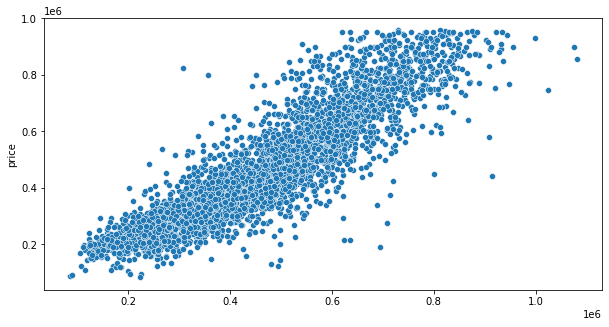

In [156]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = y_pred, y= y_test)
plt.show()

In [160]:
col_selector2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 
                'sqft_living15', 'cond_num', 'grade_num', 'view_num', 98002, 98003, 98004, 98005, 98006, 
                98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 
                98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 
                98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 
                98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 
                98178, 98188, 98198, 98199, 'bed/bath', 'bath/bed']
X = df_numeric[col_selector2]
y = df_numeric['price']

model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     658.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:45:53   Log-Likelihood:            -1.7690e+05
No. Observations:               13864   AIC:                         3.540e+05
Df Residuals:                   13779   BIC:                         3.546e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.247e+05   7.89e+04      6.651      0.000     3.7e+05    6.79e+05
bedrooms       -1.22e+04   3458.902     -3.527      0.000    -1.9e+04   -5419.153
bathrooms      2.661e+04   5851.023      4.548      0.000    1.51e+04    3.81e+04
sqft_living     133.8424      2.127     62.911      0.000     129.672     138.013
sqft_lot          0.3058      0.026     11.864      0.000       0.255       0.356
floors        -1.601e+04   2150.259     -7.444      0.000   -2.02e+04   -1.18e+04
sqft_basement   -50.6611      2.576    -19.664      0.000     -55.711     -45.611
yr_built       -304.0244     40.226     -7.558      0.000    -382.874    -225.175
yr_renovated     15.0287      2.077      7.236      0.000      10.958      19.099
sqft_living15    55.0604      2.035     27.051      0.000      51.071      59.050
sqft_lot15        0.0070      0.040      0.176      0.860      -0.071       0.085
cond_num       1093.5053   1125.452      0.972      0.331   -1112.534    3299.544
grade_num       512.0343    648.809      0.789      0.430    -759.720    1783.789
view_num      -1030.6253    974.767     -1.057      0.290   -2941.302     880.051
98002          1.327e+04   8969.242      1.480      0.139   -4306.820    3.09e+04
98003          1.069e+04   7928.947      1.348      0.178   -4853.103    2.62e+04
98004          4.883e+05   1.08e+04     45.050      0.000    4.67e+05     5.1e+05
98005          3.538e+05   9898.162     35.739      0.000    3.34e+05    3.73e+05
98006          2.866e+05   7642.077     37.506      0.000    2.72e+05    3.02e+05
98007          2.775e+05   1.05e+04     26.488      0.000    2.57e+05    2.98e+05
98008          2.619e+05   8209.678     31.907      0.000    2.46e+05    2.78e+05
98010          8.483e+04   1.17e+04      7.240      0.000    6.19e+04    1.08e+05
98011          1.418e+05   9105.945     15.576      0.000    1.24e+05     1.6e+05
98014          1.012e+05   1.08e+04      9.351      0.000       8e+04    1.22e+05
98019          7.985e+04   9490.369      8.413      0.000    6.12e+04    9.84e+04
98022          1.842e+04   8646.483      2.130      0.033    1472.066    3.54e+04
98023         -5965.9585   7020.848     -0.850      0.395   -1.97e+04    7795.859
98024          1.472e+05    1.3e+04     11.284      0.000    1.22e+05    1.73e+05
98027          1.989e+05   7536.010     26.395      0.000    1.84e+05    2.14e+05
98028          1.403e+05   8043.300     17.447      0.000    1.25e+05    1.56e+05
98029          2.477e+05   7806.370     31.735      0.000    2.32e+05    2.63e+05
98030          6518.3555   8324.946      0.783      0.434   -9799.671    2.28e+04
98031          1.962e+04   8112.755      2.419      0.016    3721.325    3.55e+04
98032          1.264e+04   1.02e+04      1.245      0.213   -7259.424    3.25e+04
98033          3.227e+05   7700.245     41.903   